<p align="center">
    <img src="polecenie.png"  width="30%">
</p>

# Import niezbędnych bibliotek

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import roc_curve, precision_recall_curve
from keras.utils.vis_utils import plot_model

# Wczytanie i przygotwanie danych oraz eksploracyjna analiza danych

1. Wczytanie pliku z nazwami kolumn

In [2]:
cols = []
with open('column_names.txt') as f:
    cols = f.readlines()
    cols = [x.split(':')[0].strip() for x in cols]

print('Liczba wczytanych nazw kolumn: ', len(cols))
print(cols)


Liczba wczytanych nazw kolumn:  1559
['height', 'width', 'aratio', 'local', 'url*images+buttons', 'url*likesbooks.com', 'url*www.slake.com', 'url*hydrogeologist', 'url*oso', 'url*media', 'url*peace+images', 'url*blipverts', 'url*tkaine+kats', 'url*labyrinth', 'url*advertising+blipverts', 'url*images+oso', 'url*area51+corridor', 'url*ran+gifs', 'url*express-scripts.com', 'url*off', 'url*cnet', 'url*time+1998', 'url*josefina3', 'url*truluck.com', 'url*clawnext+gif', 'url*autopen.com', 'url*tvgen.com', 'url*pixs', 'url*heartland+5309', 'url*meadows+9196', 'url*blue', 'url*ad+gif', 'url*area51', 'url*www.internauts.ca', 'url*afn.org', 'url*ran.org', 'url*shareware.com', 'url*baons+images', 'url*area51+labyrinth', 'url*pics', 'url*image+navigate', 'url*pool+images', 'url*carousel.org', 'url*members.accessus.net', 'url*cmp+flowsoft010', 'url*smallb+gif', 'url*www.FlowSoft.com', 'url*kandinsky', 'url*csuhayward.edu', 'url*www.yahoo.co.uk', 'url*ibitexas.com', 'url*www.haestad.com', 'url*antiw

2. Wczytanie pliku CSV ze zbiorem danych

In [3]:
df = pd.read_csv('ad.data.csv', names=cols, header=None, na_values='?')
df.fillna(df.mean(numeric_only=True), inplace=True)

mapping = {'ad.': 1, 'nonad.': 0}
df['target'] = df['target'].map(mapping)


print('Czy są wartości null? ', df.isnull().values.any())
df

Czy są wartości null?  False


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,target
0,125.000000,125.000000,1.000000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57.000000,468.000000,8.210500,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.000000,230.000000,6.969600,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.000000,468.000000,7.800000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.000000,468.000000,7.800000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170.000000,94.000000,0.552900,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275,101.000000,140.000000,1.386100,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3276,23.000000,120.000000,5.217300,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3277,64.021886,155.344828,3.911953,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('Liczba wierszy: ', df.shape[0])
print('Liczba kolumn: ', df.shape[1])

Liczba wierszy:  3279
Liczba kolumn:  1559


- Liczba elementów w zbiorze danych: **3279**
- Liczba wszystkich cech (poza ostatnią kolumną zawierającą wartości docelowe ad i nonad): **1558**


In [5]:
last_col_name = df.columns[-1]
print('Nazwa ostatniej kolumny: ', last_col_name)
df.groupby(last_col_name).size()

Nazwa ostatniej kolumny:  target


target
0    2820
1     459
dtype: int64

In [6]:
# set size of the plot

fig = px.histogram(df, x=last_col_name, title='Liczba ogłoszeń w klasach')
fig.update_layout(width=800, height=500)
fig.show()

In [7]:
df.describe()

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,target
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,64.021886,155.344828,3.911953,0.767157,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,...,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525,0.139982
std,46.703695,110.729038,5.136153,0.421740,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,...,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026,0.347021
min,1.000000,1.000000,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.500000,90.000000,1.279400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.021886,150.000000,3.911953,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.021886,155.344828,3.911953,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Podział na zbiór treningowy i testowy

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=4, stratify=df.iloc[:, -1])\

print('Liczba wierszy w zbiorze treningowym: ', X_train.shape[0])
print('Liczba wierszy w zbiorze testowym: ', X_test.shape[0])

Liczba wierszy w zbiorze treningowym:  2623
Liczba wierszy w zbiorze testowym:  656


# Usuwanie nieistotnych cech
Zbiór danych zawiera ponad 1500 cech, w związku z czym konieczne jest usunięcie części z nich (tych, o małej istotności)

### PCA

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA().fit(X_train_scaled)

fig = px.line(x=np.arange(1, len(pca.explained_variance_ratio_)+1), y=np.cumsum(pca.explained_variance_ratio_))
fig.update_layout(
    title="Wariancja wyjaśniona przez kolejne składowe - PCA",
    xaxis_title="Liczba składowych",
    yaxis_title="Wariancja wyjaśniona",
    font=dict(size=18, color="#7f7f7f"),
    width=1000,
    height=500,
)
fig.show()

pca = PCA(n_components=0.98) # 98% of variance
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('Liczba cech przed PCA: ', X_train_scaled.shape[1])
print('Liczba cech po PCA: ', X_train_pca.shape[1])


Liczba cech przed PCA:  1558
Liczba cech po PCA:  400


In [10]:
X_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)
df_pca = pd.DataFrame(X_pca)
df_pca['y'] = np.concatenate((y_train, y_test), axis=0)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,y
0,-0.566226,-0.548539,-0.262654,-0.141355,-0.035609,-0.095928,-0.074886,-0.569144,1.071096,-0.344602,...,0.047919,0.085771,-0.192506,0.030546,0.074155,-0.119260,-0.110256,0.044385,0.086872,0
1,-0.566226,-0.548539,-0.262654,-0.141355,-0.035609,-0.095928,-0.074886,-0.569144,1.071096,-0.344602,...,0.047919,0.085771,-0.192506,0.030546,0.074155,-0.119260,-0.110256,0.044385,0.086872,0
2,0.341855,0.620201,-0.113333,-0.145409,-0.066286,-0.161488,0.477446,-1.269341,0.819933,-0.291797,...,-1.964855,-0.123556,0.329979,-0.757963,0.145413,0.900581,0.674584,-0.166862,-0.920311,1
3,0.312392,1.408244,0.653262,1.018613,-0.275179,-1.252328,1.109726,1.929401,-1.480338,0.306913,...,-0.404368,0.051709,0.171838,-0.505812,1.055614,1.019723,0.056957,0.362418,-1.033799,1
4,-0.435191,-0.075351,-0.272559,-0.116692,-0.037110,-0.113250,0.015479,-0.785817,0.780302,-0.377260,...,-0.285511,0.081811,-0.870262,0.155945,-1.168335,0.072205,-0.679803,0.762206,2.484533,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,-1.325409,-1.820466,-1.171761,-1.075315,-0.433545,-2.665478,-1.933899,4.610959,-6.042462,1.469540,...,-0.041477,0.026611,-0.849147,0.108386,-0.259489,0.427740,0.849942,0.336660,-0.415057,0
3275,-0.527955,-0.506724,-0.246856,-0.138001,-0.033111,-0.087283,-0.064788,-0.589860,1.200955,-0.436395,...,-0.152627,-0.104721,-0.982086,-0.531936,0.922023,0.267866,0.839665,-0.445361,-0.128137,0
3276,105.579028,-35.473162,-0.372768,0.117665,-0.093096,-0.250456,2.357300,-8.088323,-7.472823,-0.173099,...,0.622405,-1.760257,0.490010,0.864593,0.028096,0.240777,0.260449,-0.639799,-1.077383,1
3277,-0.967600,-0.995624,-1.021690,-0.716092,-0.395859,-1.927368,-1.372362,2.619208,-3.960263,0.988279,...,-2.256234,-1.079816,-0.526275,0.914323,-1.326670,-0.518237,2.518856,-0.244738,-4.086999,0


### SVD

In [11]:
n_components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, len(df.columns)-1]
svd_explained_variance = []

for n in n_components:
    svd = TruncatedSVD(n_components=n)
    svd.fit(X_train_scaled)
    svd_explained_variance.append(svd.explained_variance_ratio_.sum())

fig = px.line(x=n_components, y=svd_explained_variance)
fig.update_layout(
    title="Wariancja wyjaśniona przez kolejne składowe - SVD",
    xaxis_title="Liczba składowych",
    yaxis_title="Wariancja wyjaśniona",
    font=dict(size=18, color="#7f7f7f"),
    width=1000,
    height=500,
)
fig.show()

In [12]:
svd = TruncatedSVD(n_components=400)
svd.fit(X_train_scaled)

X_train_svd = svd.transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

X_svd = np.concatenate((X_train_svd, X_test_svd), axis=0)
df_svd = pd.DataFrame(X_svd)
df_svd['y'] = np.concatenate((y_train, y_test), axis=0)

print('Liczba cech przed SVD: ', X_train_scaled.shape[1])
print('Liczba cech po SVD: ', X_train_svd.shape[1])

df_svd

Liczba cech przed SVD:  1558
Liczba cech po SVD:  400


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,y
0,-0.566226,-0.548539,-0.262654,-0.141355,-0.035609,-0.095928,-0.074886,-0.569144,1.071096,-0.344602,...,-0.117752,-0.036128,-0.093492,-0.293480,0.021076,-0.132189,-0.182664,-0.117706,0.207977,0
1,-0.566226,-0.548539,-0.262654,-0.141355,-0.035609,-0.095928,-0.074886,-0.569144,1.071096,-0.344602,...,-0.117752,-0.036128,-0.093492,-0.293480,0.021076,-0.132189,-0.182664,-0.117706,0.207977,0
2,0.341855,0.620201,-0.113333,-0.145409,-0.066286,-0.161488,0.477446,-1.269341,0.819933,-0.291797,...,0.120155,-0.066976,0.320079,0.747509,-0.176549,-0.332818,0.502270,0.670783,-0.124097,1
3,0.312392,1.408244,0.653262,1.018613,-0.275179,-1.252328,1.109726,1.929401,-1.480338,0.306913,...,0.373594,1.007492,0.050379,-0.774426,-0.034712,-0.143866,1.154316,0.930971,0.296571,1
4,-0.435191,-0.075351,-0.272559,-0.116692,-0.037110,-0.113250,0.015479,-0.785817,0.780302,-0.377260,...,1.112002,-0.813619,-0.854696,-0.247663,0.002018,-0.518620,-1.032351,0.208678,2.190792,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,-1.325409,-1.820466,-1.171761,-1.075315,-0.433545,-2.665478,-1.933899,4.610959,-6.042462,1.469540,...,-0.045439,-0.758444,-0.369269,-0.714891,-1.196184,0.208772,-0.040017,0.494151,0.124101,0
3275,-0.527955,-0.506724,-0.246856,-0.138001,-0.033111,-0.087283,-0.064788,-0.589860,1.200955,-0.436395,...,-0.089563,-0.136473,0.244830,-0.364976,-0.214646,-0.773918,0.367895,0.702673,0.168743,0
3276,105.579028,-35.473162,-0.372768,0.117665,-0.093096,-0.250456,2.357300,-8.088323,-7.472823,-0.173099,...,-0.837618,-0.573344,0.904416,0.635453,-0.461677,0.274083,-2.027242,-1.748024,-0.114836,1
3277,-0.967600,-0.995624,-1.021690,-0.716092,-0.395859,-1.927368,-1.372362,2.619208,-3.960263,0.988279,...,-0.499665,-2.856005,-1.309759,-0.169960,-1.884481,-0.009355,0.368632,0.737042,0.538311,0


# Modele predykcyjne do rozpoznawania reklam internetowych

In [13]:
def evaluate_model(y_test, y_pred, model_name):
    print('\nEwaluacja modelu: ', model_name)
    print('Accuracy: ', np.round(accuracy_score(y_test, y_pred), 4))
    print('Precision: ', np.round(precision_score(y_test, y_pred), 4))
    print('Recall: ', np.round(recall_score(y_test, y_pred), 4))
    print('F1: ', np.round(f1_score(y_test, y_pred), 4))
    print('ROC AUC: ', np.round(roc_auc_score(y_test, y_pred), 4))



results_df = pd.DataFrame(columns=['Accuracy - all features', 'Accuracy - PCA', 'Accuracy - SVD'])

### 1. Regresja logistyczna

In [14]:
lr_raw = LogisticRegression(max_iter=10000)
lr_raw.fit(X_train, y_train)
y_pred_raw = lr_raw.predict(X_test)
evaluate_model(y_test, y_pred_raw, 'Logistic Regression - all features')

lr_pca = LogisticRegression(max_iter=10000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
evaluate_model(y_test, y_pred_pca, 'Logistic Regression - PCA')

lr_svd = LogisticRegression(max_iter=10000)
lr_svd.fit(X_train_svd, y_train)
y_pred_svd = lr_svd.predict(X_test_svd)
evaluate_model(y_test, y_pred_svd, 'Logistic Regression - SVD')

results_df.loc['Logistic Regression'] = [np.round(accuracy_score(y_test, y_pred_raw), 4), np.round(accuracy_score(y_test, y_pred_pca), 4), np.round(accuracy_score(y_test, y_pred_svd), 4)]



Ewaluacja modelu:  Logistic Regression - all features
Accuracy:  0.9771
Precision:  0.8969
Recall:  0.9457
F1:  0.9206
ROC AUC:  0.964

Ewaluacja modelu:  Logistic Regression - PCA
Accuracy:  0.968
Precision:  0.8515
Recall:  0.9348
F1:  0.8912
ROC AUC:  0.9541

Ewaluacja modelu:  Logistic Regression - SVD
Accuracy:  0.9695
Precision:  0.8673
Recall:  0.9239
F1:  0.8947
ROC AUC:  0.9504


### 2. XGBoost

In [15]:
xgb_raw = XGBClassifier()
xgb_raw.fit(X_train, y_train)
y_pred_raw = xgb_raw.predict(X_test)
evaluate_model(y_test, y_pred_raw, 'XGBoost - all features')

xgb_pca = XGBClassifier()
xgb_pca.fit(X_train_pca, y_train)
y_pred_pca = xgb_pca.predict(X_test_pca)
evaluate_model(y_test, y_pred_pca, 'XGBoost - PCA')

xgb_svd = XGBClassifier()
xgb_svd.fit(X_train_svd, y_train)
y_pred_svd = xgb_svd.predict(X_test_svd)
evaluate_model(y_test, y_pred_svd, 'XGBoost - SVD')

results_df.loc['XGBoost'] = [np.round(accuracy_score(y_test, y_pred_raw), 4), np.round(accuracy_score(y_test, y_pred_pca), 4), np.round(accuracy_score(y_test, y_pred_svd), 4)]


Ewaluacja modelu:  XGBoost - all features
Accuracy:  0.9787
Precision:  0.9333
Recall:  0.913
F1:  0.9231
ROC AUC:  0.9512

Ewaluacja modelu:  XGBoost - PCA
Accuracy:  0.9848
Precision:  0.9271
Recall:  0.9674
F1:  0.9468
ROC AUC:  0.9775

Ewaluacja modelu:  XGBoost - SVD
Accuracy:  0.9802
Precision:  0.9072
Recall:  0.9565
F1:  0.9312
ROC AUC:  0.9703


### 3. Random Forest Classifier

In [16]:
rf_raw = RandomForestClassifier()
rf_raw.fit(X_train, y_train)
y_pred_raw = rf_raw.predict(X_test)
evaluate_model(y_test, y_pred_raw, 'Random Forest - all features')

rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
evaluate_model(y_test, y_pred_pca, 'Random Forest - PCA')

rf_svd = RandomForestClassifier()
rf_svd.fit(X_train_svd, y_train)
y_pred_svd = rf_svd.predict(X_test_svd)
evaluate_model(y_test, y_pred_svd, 'Random Forest - SVD')

results_df.loc['Random Forest'] = [np.round(accuracy_score(y_test, y_pred_raw), 4), np.round(accuracy_score(y_test, y_pred_pca), 4), np.round(accuracy_score(y_test, y_pred_svd), 4)]


Ewaluacja modelu:  Random Forest - all features
Accuracy:  0.9909
Precision:  0.9674
Recall:  0.9674
F1:  0.9674
ROC AUC:  0.981

Ewaluacja modelu:  Random Forest - PCA
Accuracy:  0.9817
Precision:  0.9348
Recall:  0.9348
F1:  0.9348
ROC AUC:  0.9621

Ewaluacja modelu:  Random Forest - SVD
Accuracy:  0.9832
Precision:  0.9355
Recall:  0.9457
F1:  0.9405
ROC AUC:  0.9675


### 4. Support Vector Classifier

In [17]:
svc_raw = SVC(probability=True)
svc_raw.fit(X_train, y_train)
y_pred_raw = svc_raw.predict(X_test)
evaluate_model(y_test, y_pred_raw, 'SVC - all features')

svc_pca = SVC(probability=True)
svc_pca.fit(X_train_pca, y_train)
y_pred_pca = svc_pca.predict(X_test_pca)
evaluate_model(y_test, y_pred_pca, 'SVC - PCA')

svc_svd = SVC(probability=True)
svc_svd.fit(X_train_svd, y_train)
y_pred_svd = svc_svd.predict(X_test_svd)
evaluate_model(y_test, y_pred_svd, 'SVC - SVD')

results_df.loc['SVC'] = [np.round(accuracy_score(y_test, y_pred_raw), 4), np.round(accuracy_score(y_test, y_pred_pca), 4), np.round(accuracy_score(y_test, y_pred_svd), 4)]


Ewaluacja modelu:  SVC - all features
Accuracy:  0.9177
Precision:  0.8958
Recall:  0.4674
F1:  0.6143
ROC AUC:  0.7293

Ewaluacja modelu:  SVC - PCA
Accuracy:  0.9817
Precision:  1.0
Recall:  0.8696
F1:  0.9302
ROC AUC:  0.9348

Ewaluacja modelu:  SVC - SVD
Accuracy:  0.9817
Precision:  1.0
Recall:  0.8696
F1:  0.9302
ROC AUC:  0.9348


### 5. K-Nearest Neighbours

In [18]:
knn_raw = KNeighborsClassifier()
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
evaluate_model(y_test, y_pred_raw, 'KNN - all features')

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
evaluate_model(y_test, y_pred_pca, 'KNN - PCA')

knn_svd = KNeighborsClassifier()
knn_svd.fit(X_train_svd, y_train)
y_pred_svd = knn_svd.predict(X_test_svd)
evaluate_model(y_test, y_pred_svd, 'KNN - SVD')

results_df.loc['KNN'] = [np.round(accuracy_score(y_test, y_pred_raw), 4), np.round(accuracy_score(y_test, y_pred_pca), 4), np.round(accuracy_score(y_test, y_pred_svd), 4)]


Ewaluacja modelu:  KNN - all features
Accuracy:  0.9527
Precision:  0.8765
Recall:  0.7717
F1:  0.8208
ROC AUC:  0.877

Ewaluacja modelu:  KNN - PCA
Accuracy:  0.9695
Precision:  0.95
Recall:  0.8261
F1:  0.8837
ROC AUC:  0.9095

Ewaluacja modelu:  KNN - SVD
Accuracy:  0.9665
Precision:  0.9487
Recall:  0.8043
F1:  0.8706
ROC AUC:  0.8986


### 6. Sieć neuronowa

In [19]:
def create_simple_nn(input_dim: int):
    model = Sequential([
        Dense(32, input_dim=input_dim, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_advanced_nn(input_dim: int):
    model = Sequential([
        Dense(512, input_dim=input_dim, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

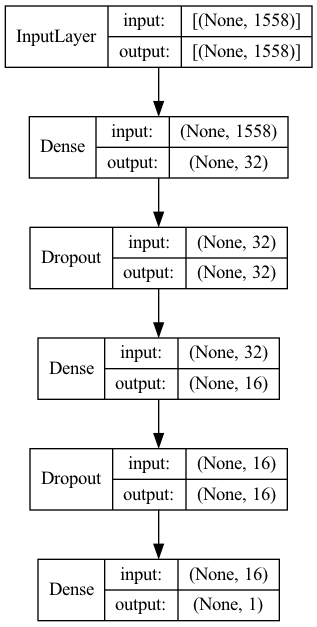

In [29]:
plot_model(create_simple_nn(X_train.shape[1]), to_file='simple_nn.png', show_shapes=True, show_layer_names=False)

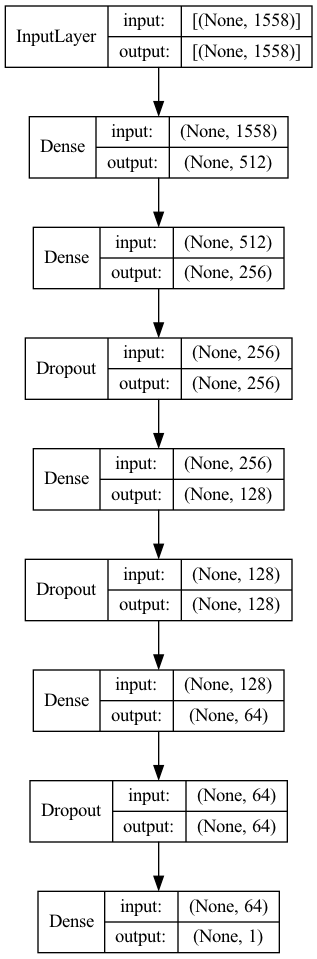

In [30]:
plot_model(create_advanced_nn(X_train.shape[1]), to_file='advanced_nn.png', show_shapes=True, show_layer_names=False)

In [20]:
nn_simple_raw = create_simple_nn(X_train.shape[1])
nn_simple_raw.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_raw = nn_simple_raw.predict(X_test)
# get binary values
y_pred_raw = np.where(y_pred_raw > 0.5, 1, 0)
evaluate_model(y_test, y_pred_raw, 'NN - simple architecture - all features')

nn_simple_pca = create_simple_nn(X_train_pca.shape[1])
nn_simple_pca.fit(X_train_pca, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_pca = nn_simple_pca.predict(X_test_pca)
y_pred_pca = np.where(y_pred_pca > 0.5, 1, 0)
evaluate_model(y_test, y_pred_pca, 'NN - simple architecture - PCA')

nn_simple_svd = create_simple_nn(X_train_svd.shape[1])
nn_simple_svd.fit(X_train_svd, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_svd = nn_simple_svd.predict(X_test_svd)
y_pred_svd = np.where(y_pred_svd > 0.5, 1, 0)
evaluate_model(y_test, y_pred_svd, 'NN - simple architecture - SVD')

results_df.loc['NN - simple architecture'] = [np.round(accuracy_score(y_test, y_pred_raw), 4), np.round(accuracy_score(y_test, y_pred_pca), 4), np.round(accuracy_score(y_test, y_pred_svd), 4)]

Epoch 1/10


2023-06-18 18:44:17.368600: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


82/82 [==============================] - 0s 874us/step - loss: 0.9452 - accuracy: 0.7568
Epoch 2/10
82/82 [==============================] - 0s 784us/step - loss: 0.3903 - accuracy: 0.8811
Epoch 3/10
82/82 [==============================] - 0s 774us/step - loss: 0.2502 - accuracy: 0.9169
Epoch 4/10
82/82 [==============================] - 0s 785us/step - loss: 0.2100 - accuracy: 0.9283
Epoch 5/10
82/82 [==============================] - 0s 767us/step - loss: 0.1785 - accuracy: 0.9455
Epoch 6/10
82/82 [==============================] - 0s 772us/step - loss: 0.1679 - accuracy: 0.9436
Epoch 7/10
82/82 [==============================] - 0s 752us/step - loss: 0.1450 - accuracy: 0.9501
Epoch 8/10
82/82 [==============================] - 0s 755us/step - loss: 0.1297 - accuracy: 0.9588
Epoch 9/10
82/82 [==============================] - 0s 765us/step - loss: 0.1317 - accuracy: 0.9573
Epoch 10/10
21/21 [==============================] - 0s 471us/step

Ewaluacja modelu:  NN - simple architecture

In [21]:
nn_advanced_raw = create_advanced_nn(X_train.shape[1])
nn_advanced_raw.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_raw = nn_advanced_raw.predict(X_test)
y_pred_raw = np.where(y_pred_raw > 0.5, 1, 0)
evaluate_model(y_test, y_pred_raw, 'NN - advanced architecture - all features')

nn_advanced_pca = create_advanced_nn(X_train_pca.shape[1])
nn_advanced_pca.fit(X_train_pca, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_pca = nn_advanced_pca.predict(X_test_pca)
y_pred_pca = np.where(y_pred_pca > 0.5, 1, 0)
evaluate_model(y_test, y_pred_pca, 'NN - advanced architecture - PCA')

nn_advanced_svd = create_advanced_nn(X_train_svd.shape[1])
nn_advanced_svd.fit(X_train_svd, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_svd = nn_advanced_svd.predict(X_test_svd)
y_pred_svd = np.where(y_pred_svd > 0.5, 1, 0)
evaluate_model(y_test, y_pred_svd, 'NN - advanced architecture - SVD')

results_df.loc['NN - advanced architecture'] = [np.round(accuracy_score(y_test, y_pred_raw), 4), np.round(accuracy_score(y_test, y_pred_pca), 4), np.round(accuracy_score(y_test, y_pred_svd), 4)]

Epoch 1/10
82/82 [==============================] - 1s 3ms/step - loss: 0.5805 - accuracy: 0.8185
Epoch 2/10
82/82 [==============================] - 0s 4ms/step - loss: 0.3067 - accuracy: 0.9024
Epoch 3/10
82/82 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.9344
Epoch 4/10
82/82 [==============================] - 0s 5ms/step - loss: 0.1531 - accuracy: 0.9516
Epoch 5/10
82/82 [==============================] - 0s 5ms/step - loss: 0.1433 - accuracy: 0.9527
Epoch 6/10
82/82 [==============================] - 0s 5ms/step - loss: 0.1305 - accuracy: 0.9638
Epoch 7/10
82/82 [==============================] - 0s 5ms/step - loss: 0.1070 - accuracy: 0.9630
Epoch 8/10
82/82 [==============================] - 0s 5ms/step - loss: 0.1096 - accuracy: 0.9680
Epoch 9/10
82/82 [==============================] - 0s 5ms/step - loss: 0.0994 - accuracy: 0.9680
Epoch 10/10
21/21 [==============================] - 0s 1ms/step

Ewaluacja modelu:  NN - advanced architecture - all 

In [22]:
results_df

,Accuracy - all features,Accuracy - PCA,Accuracy - SVD
Logistic Regression,0.9771,0.9680,0.9695
XGBoost,0.9787,0.9848,0.9802
Random Forest,0.9909,0.9817,0.9832
SVC,0.9177,0.9817,0.9817
KNN,0.9527,0.9695,0.9665
NN - simple architecture,0.9726,0.9787,0.9832
NN - advanced architecture,0.9787,0.9741,0.9665


In [23]:
# get best models from results for each of 3 columns (together with their accuracies) and save them as dataframe
best_models = results_df.idxmax(axis=0)
best_models_accuracy = results_df.max(axis=0)
best_models_df = pd.DataFrame({'best_model': best_models, 'accuracy': best_models_accuracy})
best_models_df

,best_model,accuracy
Accuracy - all features,Random Forest,0.9909
Accuracy - PCA,XGBoost,0.9848
Accuracy - SVD,Random Forest,0.9832


In [24]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Raw data', 'PCA', 'SVD'))

model_names = ['Logistic Regression', 'XGBoost', 'Random Forest', 'SVC', 'KNN', 'NN - simple architecture', 'NN - advanced architecture']
models_raw = [lr_raw, xgb_raw, rf_raw, svc_raw, knn_raw, nn_simple_raw, nn_advanced_raw]
models_pca = [lr_pca, xgb_pca, rf_pca, svc_pca, knn_pca, nn_simple_pca, nn_advanced_pca]
models_svd = [lr_svd, xgb_svd, rf_svd, svc_svd, knn_svd, nn_simple_svd, nn_advanced_svd]

for model in zip(model_names, models_raw, models_pca, models_svd):
    name = model[0]
    model_raw = model[1]
    model_pca = model[2]
    model_svd = model[3]
    if name == 'NN - simple architecture' or name == 'NN - advanced architecture':
        fpr_raw, tpr_raw, _ = roc_curve(y_test, model_raw.predict(X_test))
        fpr_pca, tpr_pca, _ = roc_curve(y_test, model_pca.predict(X_test_pca))
        fpr_svd, tpr_svd, _ = roc_curve(y_test, model_svd.predict(X_test_svd))
    else:
        fpr_raw, tpr_raw, _ = roc_curve(y_test, model_raw.predict_proba(X_test)[:,1])
        fpr_pca, tpr_pca, _ = roc_curve(y_test, model_pca.predict_proba(X_test_pca)[:,1])
        fpr_svd, tpr_svd, _ = roc_curve(y_test, model_svd.predict_proba(X_test_svd)[:,1])
    fig.add_trace(go.Scatter(x=fpr_raw, y=tpr_raw, name=name, mode='lines'), row=1, col=1)
    fig.add_trace(go.Scatter(x=fpr_pca, y=tpr_pca, name=name+' - PCA', mode='lines'), row=1, col=2)
    fig.add_trace(go.Scatter(x=fpr_svd, y=tpr_svd, name=name+' - SVD', mode='lines'), row=1, col=3)

    fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name='Baseline', mode='lines', line=dict(dash='dash')), row=1, col=1)
    fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name='Baseline - PCA', mode='lines', line=dict(dash='dash')), row=1, col=2)
    fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name='Baseline - SVD', mode='lines', line=dict(dash='dash')), row=1, col=3)

fig.update_layout(title='ROC curves for all models', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', width=2400, height=800)
fig.show()

21/21 [==============================] - 0s 805us/step


In [25]:
# precision-recall curves
fig = make_subplots(rows=1, cols=3, subplot_titles=('Raw data', 'PCA', 'SVD'))

for model in zip(model_names, models_raw, models_pca, models_svd):
    name = model[0]
    model_raw = model[1]
    model_pca = model[2]
    model_svd = model[3]
    if name == 'NN - simple architecture' or name == 'NN - advanced architecture':
        precision_raw, recall_raw, _ = precision_recall_curve(y_test, model_raw.predict(X_test))
        precision_pca, recall_pca, _ = precision_recall_curve(y_test, model_pca.predict(X_test_pca))
        precision_svd, recall_svd, _ = precision_recall_curve(y_test, model_svd.predict(X_test_svd))
    else:
        precision_raw, recall_raw, _ = precision_recall_curve(y_test, model_raw.predict_proba(X_test)[:,1])
        precision_pca, recall_pca, _ = precision_recall_curve(y_test, model_pca.predict_proba(X_test_pca)[:,1])
        precision_svd, recall_svd, _ = precision_recall_curve(y_test, model_svd.predict_proba(X_test_svd)[:,1])
    fig.add_trace(go.Scatter(x=recall_raw, y=precision_raw, name=name, mode='lines'), row=1, col=1)
    fig.add_trace(go.Scatter(x=recall_pca, y=precision_pca, name=name+' - PCA', mode='lines'), row=1, col=2)
    fig.add_trace(go.Scatter(x=recall_svd, y=precision_svd, name=name+' - SVD', mode='lines'), row=1, col=3)

fig.update_layout(title='Precision-recall curves for all models', xaxis_title='Recall', yaxis_title='Precision', width=2400, height=800)
fig.show()

21/21 [==============================] - 0s 757us/step
